In [1]:
#Lo primeo que hacemos es importar las librerias que necesitamos

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import bokeh
import requests

In [12]:
#A continuacion cargamos y leemos el CSV que vamos a trabajar (nuestro dataset)
#Destacar que a veces no estara codificado en UTF-8, por lo que tendremos que codificarlo nosotros mismos a un formato adecuado para su lectura y carga
df=pd.read_csv('rpg_steam_clean3.csv', encoding='latin1', sep=';')
# Si 'latin1' no funciona, puedes probar con 'ISO-8859-1' o 'cp1252'
# df = pd.read_csv('rpg_steam_clean3.csv', encoding='ISO-8859-1')

#El siguiente paso es transformar los tipos de datos que ya tienen las celdas en el dataset
#a los tipos que necesitamos

# Lista de columnas a convertir a numérico
columns_to_numeric = [
    'steamidnumber',
    #'releasemonth', # Eliminado de aquí para mantenerlo como texto
    'releaseyear',
    'lowestestimatedownersnumber',
    'highestestimatedownersnumber',
    'averageestimatedownersnumber'
]

# Convertir las columnas a numérico, forzando los errores o celdas vacias a NaN
for col in columns_to_numeric:
    # Algunos valores pueden contener texto no numérico, como 'N/A' o '-' o espacios extra
    # Primero intentamos limpiar la columna si es de tipo objeto
    if df[col].dtype == 'object':
        df[col] = df[col].astype(str).str.replace('[^0-9.]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Limpiar y convertir 'releaseprice' a numérico
if 'releaseprice' in df.columns:
    df['releaseprice'] = df['releaseprice'].astype(str) # Asegurar que es string para la limpieza
    # Reemplazar valores como 'Gratis' o 'Free' con '0.0' o manejar como NaN si no se desea 0
    df['releaseprice'] = df['releaseprice'].replace(['Gratis', 'Free', 'N/A'], '0.0')
    # Eliminar símbolos de moneda y otros caracteres no numéricos, manteniendo el punto decimal
    df['releaseprice'] = df['releaseprice'].str.replace('[€$]', '', regex=True) # Elimina € y $
    df['releaseprice'] = df['releaseprice'].str.replace(',', '.', regex=False) # Reemplaza coma por punto para decimales
    # Eliminar cualquier carácter que no sea un dígito o un punto
    df['releaseprice'] = df['releaseprice'].str.replace(r'[^\d.]', '', regex=True)
    df['releaseprice'] = pd.to_numeric(df['releaseprice'], errors='coerce')

    # Dividir la columna 'releaseprice' por 10 para que la columna de precios se vea reflejada en la moneda que nos interesa
    df['releaseprice'] = df['releaseprice'] / 10

# Convertir gametitle, developer, publisher y releasemonth a tipo de dato string
columns_to_string = ['gametitle', 'developer', 'publisher', 'releasemonth'] # Agregado 'releasemonth'
for col in columns_to_string:
    if col in df.columns:
        df[col] = df[col].astype(str).astype('string') # Convertir a StringDtype de pandas

print("Tipo de dato para cada columna después de la conversión:")
print(df.dtypes)

print("\nPrimeras 5 filas del DataFrame después de la conversión:")
display(df.head())

# Función para formatear 'releaseprice' como moneda (solo para visualización)
def format_to_euro(price):
    if pd.isna(price):
        return None # O 'N/A' o '-' según prefieras
    return f"€ {price:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".") # Formato europeo

print("\nEjemplo de 'releaseprice' formateado como moneda (solo para visualización):")
display(df[['gametitle', 'releaseprice']].head().assign(
    releaseprice_euro=lambda x: x['releaseprice'].apply(format_to_euro)
))

Tipo de dato para cada columna después de la conversión:
steamidnumber                            int64
gametitle                       string[python]
releasemonth                    string[python]
releaseyear                            float64
releaseprice                           float64
lowestestimatedownersnumber            float64
highestestimatedownersnumber           float64
averageestimatedownersnumber           float64
developer                       string[python]
publisher                       string[python]
dtype: object

Primeras 5 filas del DataFrame después de la conversión:


,steamidnumber,gametitle,releasemonth,releaseyear,releaseprice,lowestestimatedownersnumber,highestestimatedownersnumber,averageestimatedownersnumber,developer,publisher
0,1,DiscoElysiumTheFinalCut,October,2019.0,NaN,1000000.0,2000000.0,1500000.0,ZA/UM,ZA/UM
1,2,BioShock,August,2007.0,49.9,1000000.0,2000000.0,1500000.0,2KBoston2KAustralia,2K
2,3,MassEffect22010,January,2010.0,NaN,1000000.0,2000000.0,1500000.0,BioWare,ElectronicArts
3,4,MassEffect2DigitalDeluxeEdition,January,2010.0,NaN,1000000.0,2000000.0,1500000.0,BioWare,ElectronicArts
4,5,DivinityOriginalSinEnhancedEdition,October,2015.0,NaN,1000000.0,2000000.0,1500000.0,LarianStudios,LarianStudios



Ejemplo de 'releaseprice' formateado como moneda (solo para visualización):


,gametitle,releaseprice,releaseprice_euro
0,DiscoElysiumTheFinalCut,NaN,None
1,BioShock,49.9,"€ 49,90"
2,MassEffect22010,NaN,None
3,MassEffect2DigitalDeluxeEdition,NaN,None
4,DivinityOriginalSinEnhancedEdition,NaN,None


In [14]:
#Ahora imprimimos las mil primeras y mil ultimas celdas para comprobar que no haya datos erroneos

print('Primeras 10 filas del dataset:\n')
print(df.head(1000))

print('\nUltimas 10 filas del dataset:\n')
print(df.tail(10))



Primeras 10 filas del dataset:

     steamidnumber                           gametitle releasemonth  \
0                1             DiscoElysiumTheFinalCut      October   
1                2                            BioShock       August   
2                3                     MassEffect22010      January   
3                4     MassEffect2DigitalDeluxeEdition      January   
4                5  DivinityOriginalSinEnhancedEdition      October   
..             ...                                 ...          ...   
995            996                            NeonTide    September   
996            997                          Imaginator        March   
997            998              DreamsofSolariChapter1         July   
998            999                                 nan         July   
999           1000                       ParaisoIsland         June   

     releaseyear  releaseprice  lowestestimatedownersnumber  \
0         2019.0           NaN                    10

In [15]:
#Ya estamos listos para empezar el analisis exploratorio propiamente dicho
#despues de arreglarlos y presentarlos

#Lo primero es descripbir los tipos de datos
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   steamidnumber                 9999 non-null   int64  
 1   gametitle                     9999 non-null   string 
 2   releasemonth                  9999 non-null   string 
 3   releaseyear                   9991 non-null   float64
 4   releaseprice                  7240 non-null   float64
 5   lowestestimatedownersnumber   9991 non-null   float64
 6   highestestimatedownersnumber  9991 non-null   float64
 7   averageestimatedownersnumber  9991 non-null   float64
 8   developer                     9999 non-null   string 
 9   publisher                     9999 non-null   string 
dtypes: float64(5), int64(1), string(4)
memory usage: 781.3 KB
None


In [ ]:
#Ahora vamos a empezar a sacar conclusiones y relaciones sobre los datos

#El analisis de este dataset se compondrá de la siguientes preguntas:
# 1º ¿Son todos los datos en la columna de releaseprice correctos?
# Vamos a tratar como outlier todos los que tengan un valor de 70 o mas en release price



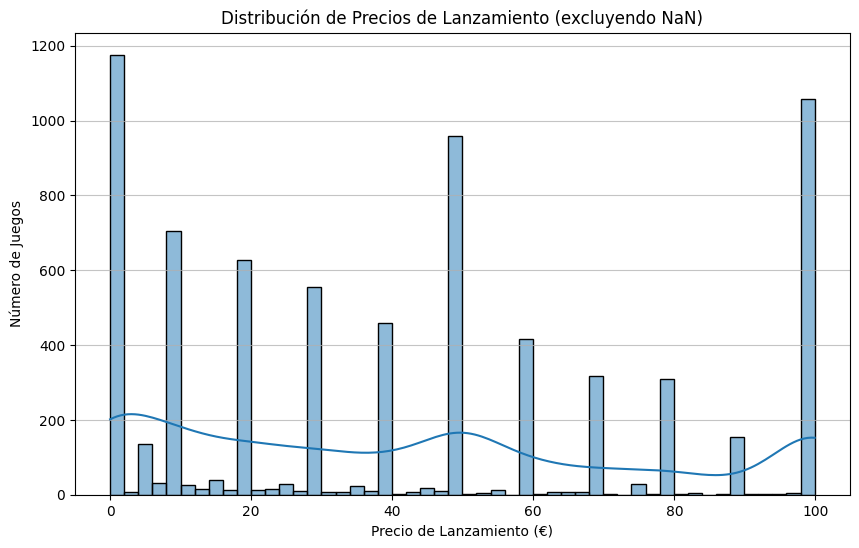

In [16]:
# Filtrar los valores NaN de 'releaseprice' porque son juegos F2P y se monetizan de otra forma
price_data = df['releaseprice'].dropna()

plt.figure(figsize=(10, 6))
sns.histplot(price_data, bins=50, kde=True)
plt.title('Distribución de Precios de Lanzamiento (excluyendo NaN)')
plt.xlabel('Precio de Lanzamiento (€)')
plt.ylabel('Número de Juegos')
plt.grid(axis='y', alpha=0.75)
plt.show()

Ahora, vamos a categorizar los juegos según si su `releaseprice` es menor o igual de 70 o mayor de 70, y visualizar esta distribución en un gráfico de barras para identificar los 'outliers'.

/tmp/ipython-input-1362763620.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Price Category', data=price_categories_df, palette='viridis')


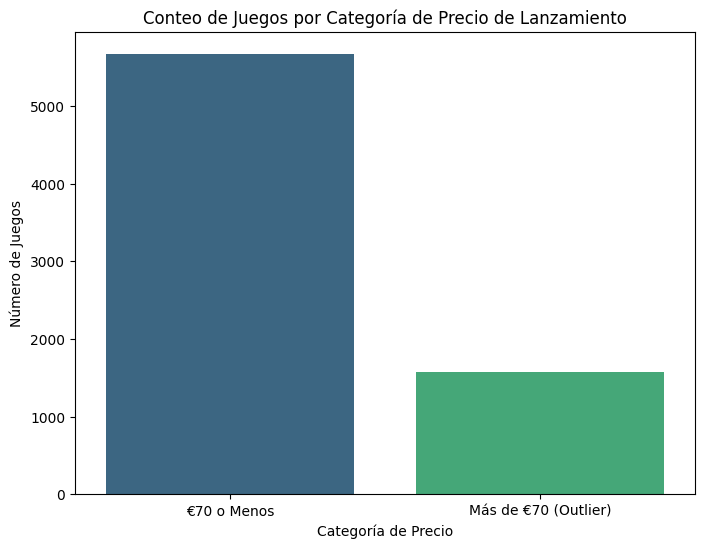

In [20]:
# Clasificar los precios en dos categorías: <= 70 y > 70 (ajustado para la división por 10)
price_categories = []
# Definir el nuevo umbral para los outliers (e.g., 70 euros después de dividir por 10)
new_outlier_threshold = 70.0

for price in price_data:
    if price <= new_outlier_threshold:
        price_categories.append(f'€{new_outlier_threshold:.0f} o Menos')
    else:
        price_categories.append(f'Más de €{new_outlier_threshold:.0f} (Outlier)')

# Convertir la lista a un DataFrame para facilitar el conteo y la visualización
price_categories_df = pd.DataFrame(price_categories, columns=['Price Category'])

plt.figure(figsize=(8, 6))
sns.countplot(x='Price Category', data=price_categories_df, palette='viridis')
plt.title('Conteo de Juegos por Categoría de Precio de Lanzamiento')
plt.xlabel('Categoría de Precio')
plt.ylabel('Número de Juegos')
plt.show()

In [ ]:
# 2º ¿Existe una relacion entre el precio de un juego y si pertenece a un publisher famoso?
# 3º ¿Existen muchas diferencias de precio entre juegos publicados por publishers famosos, publishers no conocidos y los juegos autopublicados?

### 2º ¿Existe una relación entre el precio de un juego y si pertenece a un publisher famoso?

Para responder a esta pregunta, primero clasificaremos los publishers en 'famosos' y 'no famosos' y luego visualizaremos la distribución de precios.

Conteo de juegos por categoría de publisher:


,count
publisher_category,
AutoPublicado,6823
Indie o No Publisher,3025
Famoso,151



Primeras filas del DataFrame con la nueva columna 'publisher_category':


,developer,publisher,releaseprice,publisher_category
0,ZA/UM,ZA/UM,NaN,AutoPublicado
1,2KBoston2KAustralia,2K,49.9,Famoso
2,BioWare,ElectronicArts,NaN,Famoso
3,BioWare,ElectronicArts,NaN,Famoso
4,LarianStudios,LarianStudios,NaN,AutoPublicado


/tmp/ipython-input-799738868.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='publisher_category', data=df, palette='viridis', order=df['publisher_category'].value_counts().index)


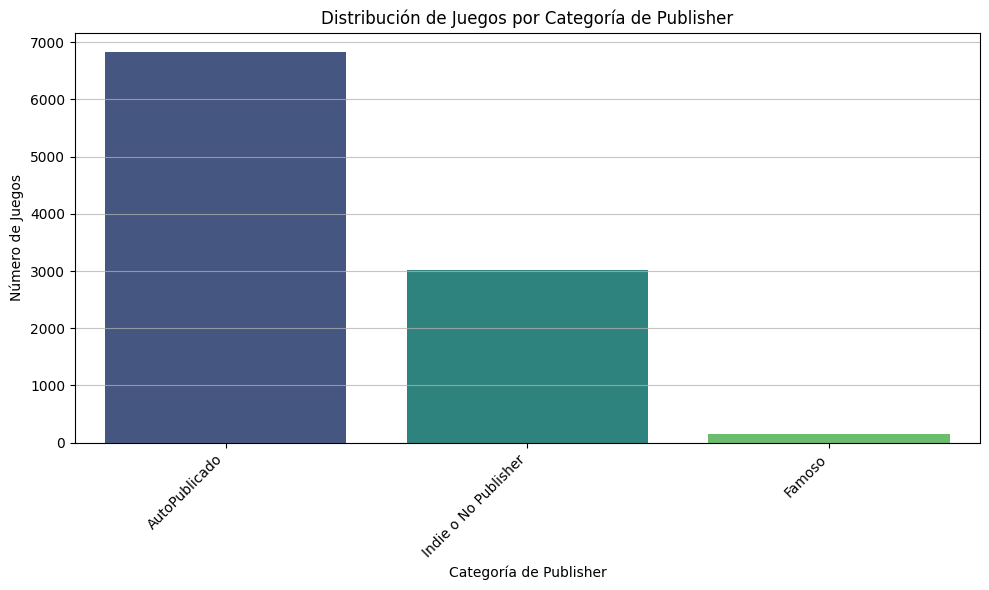

In [23]:
# Lista de publishers famosos (normalizando a minúsculas para una comparación robusta)
famous_publishers_list = [
    '2K', 'ElectronicArts', 'PlayStationPCLLC', 'PlayStation', 'BethesdaSoftworks',
    'BandaiNamco', 'NCSOFT', 'bilibili', 'Capcom', 'THQNordic', 'ParadoxInteractive',
    'Team17', 'SEGA'
]
# Convertir todos a minúsculas para una comparación insensible a mayúsculas/minúsculas
famous_publishers_lower = [p.lower() for p in famous_publishers_list]

# Crear una nueva columna 'publisher_category'
df['publisher_category'] = 'Indie o No Publisher'

# Asegurarse de que las columnas 'developer' y 'publisher' sean de tipo string
df['developer'] = df['developer'].astype(str)
df['publisher'] = df['publisher'].astype(str)

# Clasificar como 'AutoPublicado'
df.loc[df['developer'].str.lower() == df['publisher'].str.lower(), 'publisher_category'] = 'AutoPublicado'

# Clasificar como 'Famoso' (prevalece sobre 'Indie o No Publisher' si un autopublicado también es famoso)
# Iterar sobre las filas para manejar la prioridad si un autopublicado es también famoso
for index, row in df.iterrows():
    if row['publisher'].lower() in famous_publishers_lower:
        df.loc[index, 'publisher_category'] = 'Famoso'

# Mostrar el conteo de juegos por categoría de publisher
print("Conteo de juegos por categoría de publisher:")
display(df['publisher_category'].value_counts())

# Mostrar las primeras filas con la nueva columna
print("\nPrimeras filas del DataFrame con la nueva columna 'publisher_category':")
display(df[['developer', 'publisher', 'releaseprice', 'publisher_category']].head())

# Generar gráfico de barras para el conteo de categorías de publisher
plt.figure(figsize=(10, 6))
sns.countplot(x='publisher_category', data=df, palette='viridis', order=df['publisher_category'].value_counts().index)
plt.title('Distribución de Juegos por Categoría de Publisher')
plt.xlabel('Categoría de Publisher')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

Ahora, vamos a visualizar la distribución de los precios de lanzamiento (`releaseprice`) para cada categoría de publisher (`is_famous_publisher`). Utilizaremos un box plot, que es ideal para comparar distribuciones de datos numéricos entre diferentes grupos. Excluiremos los valores `NaN` de `releaseprice` para esta visualización.

/tmp/ipython-input-3155225599.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='publisher_category', y='releaseprice', data=df.dropna(subset=['releaseprice']), palette='viridis')


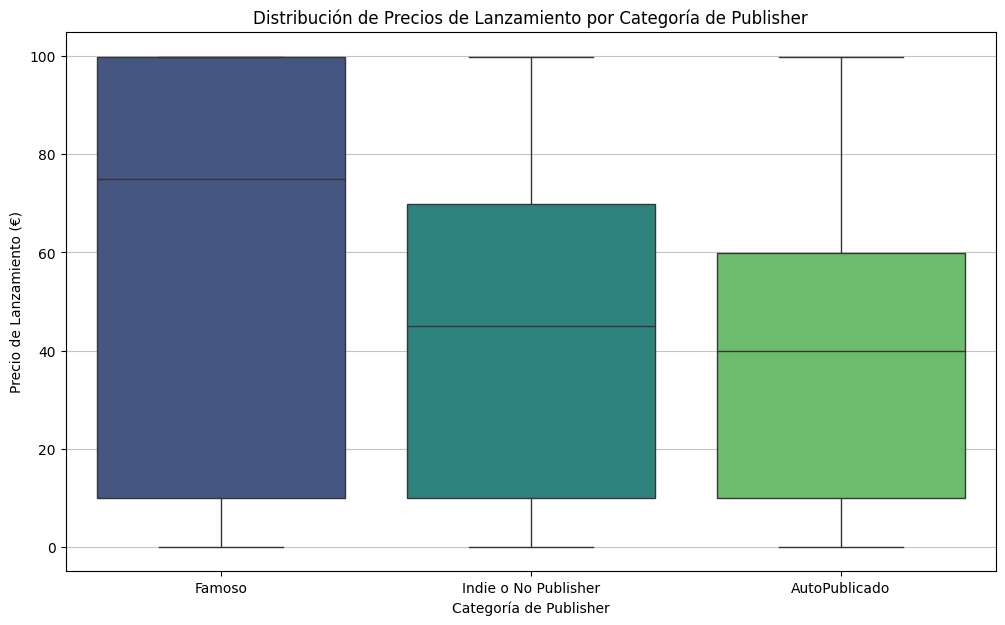

In [22]:
plt.figure(figsize=(12, 7))
# Filtrar NaN en releaseprice para la visualización
sns.boxplot(x='publisher_category', y='releaseprice', data=df.dropna(subset=['releaseprice']), palette='viridis')
plt.title('Distribución de Precios de Lanzamiento por Categoría de Publisher')
plt.xlabel('Categoría de Publisher')
plt.ylabel('Precio de Lanzamiento (€)')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
# 4º ¿Cuales son los motivos por los que un juego puede vender mas o menos? ¿influye si es publicado o developeado por una empresa famosa?



In [ ]:
df['developer_category'] = 'Indie o No Famoso'

# Ensure 'developer' and 'publisher' columns are string types for robust comparison
df['developer'] = df['developer'].astype(str)
df['publisher'] = df['publisher'].astype(str)

# Classify as 'AutoPublicado' where developer matches publisher (case-insensitive)
df.loc[df['developer'].str.lower() == df['publisher'].str.lower(), 'developer_category'] = 'AutoPublicado'

# Classify as 'Famoso' if the developer is in the famous publishers list.
# This iteration ensures 'Famoso' takes precedence over 'AutoPublicado' or 'Indie o No Famoso'.
for index, row in df.iterrows():
    if row['developer'].lower() in famous_publishers_lower:
        df.loc[index, 'developer_category'] = 'Famoso'

print("Conteo de juegos por categoría de desarrollador:")
display(df['developer_category'].value_counts())

print("\nPrimeras filas del DataFrame con la nueva columna 'developer_category':")
display(df[['developer', 'publisher', 'developer_category']].head())

/tmp/ipython-input-825366709.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='publisher_category', y='averageestimatedownersnumber', data=avg_owners_by_publisher_category, palette='viridis')


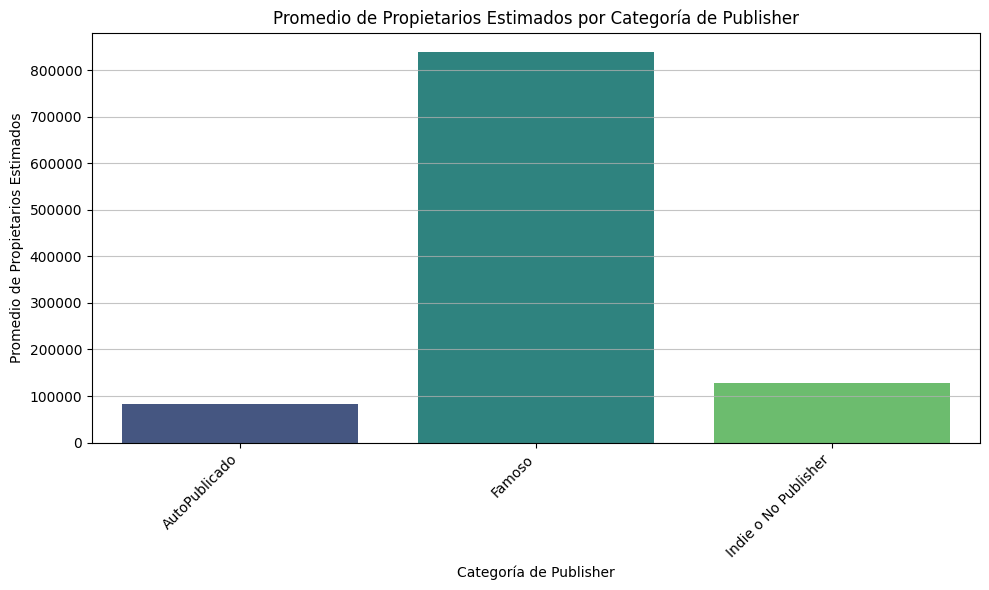

In [25]:
# Calcular el promedio de 'averageestimatedownersnumber' por 'publisher_category'
avg_owners_by_publisher_category = df.groupby('publisher_category')['averageestimatedownersnumber'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='publisher_category', y='averageestimatedownersnumber', data=avg_owners_by_publisher_category, palette='viridis')
plt.title('Promedio de Propietarios Estimados por Categoría de Publisher')
plt.xlabel('Categoría de Publisher')
plt.ylabel('Promedio de Propietarios Estimados')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()